# List manipulations
1. flatten(a): Write a function that flattens a list (optional: show multiple implementations) – Hint: this is a recursive function!
 - Input: [[[1, 2, 3], [4, 5, 6], [7], [8, 9], 10]]
 - Output: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [3]:
def flatten(a):
    if len(a) == 0:
        return []
    if not type(a) == type([]):
        return [a]
    if type(a[0]) == type([]): 
        return flatten(a[0])+flatten(a[1:])
    else:
        return a[:1]+flatten(a[1:])
    

a = [[[1,2,3],[4,5,6],[7],[8,9],10]]
print(flatten(a))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


2. identical(a, b): Write a python program to check whether two lists are circularly identical (a circular list is a list where we consider the first element as next of last element, forming a “circle”).
 - identical([10, 10, 0, 10], [10, 10, 10, 0]) -> True
 - identical([10, 10, 5, 10], [10, 10, 10, 0]) -> False

In [23]:
def identical(a, b):
    longer = b*2
    for i,elt in enumerate(b):
        if a[0] == elt:
            was = True
            for j, a_elt in enumerate(a[1:]):
                if not a_elt == longer[i+j+1]:
                    was = False
                    break
            if was:
                return True
    return False

                    
                    
print(identical([10, 10, 0, 10],[10, 10, 10, 0]))
print(identical([10, 10, 5, 10],[10, 10, 10, 0]))
print(identical([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[2, 3, 4, 5, 6, 7, 8, 9, 10, 1]))

True
False
True


3. chunks(list, size): Split list to chunks with this function taking the list and the size for the chunks required.
 - Input: [1,2,3,5,1,3,4,12,3,5,3,2,3,4,5], 6
 - Output: [1, 2, 3, 5, 1, 3], [4, 12, 3, 5, 3, 2], [3, 4, 5]

In [31]:
def chunks(l, size):
    result = []
    mod = 1 if len(l)%size > 0 else 0
    for i in range(len(l)//size + mod):
        result.append(l[i*size:(i+1)*size])
    return result

chunks([1,2,3,5,1,3,4,12,3,5,3,2,3,4,5], 6)

[[1, 2, 3, 5, 1, 3], [4, 12, 3, 5, 3, 2], [3, 4, 5]]

# Tuple manipulations
1. sortbyfloat(a): Write a Python function to sort a list by the tuples’ second, float element. Hint: try using lambda functions for key to sorted().
 - Input: [('item1', 12.20), ('item2', 15.10), ('item3',24.5)]
 - Output: [('item3', 24.5), ('item2', 15.10), ('item1',12.20)]

In [33]:
def sortbyfloat(a):
    return sorted(a, key=lambda x: x[1], reverse=True)

sortbyfloat([('item1', 12.20), ('item2', 15.10), ('item3',24.5)])

[('item3', 24.5), ('item2', 15.1), ('item1', 12.2)]

2. addbyelement(t1, t2): Write a function that adds two tuples by elements. Hint: try using functions such as map(), sum() and zip().

    - Input: (1,2,3), (1,2,3)
    - Output: (2,4,6)
    - Input: (1,5,1), (1,-4,3)
    - Output: (2,1,4)

In [47]:
def addbyelement(t1, t2):
    return tuple(map(sum, tuple(zip(t1,t2))))

print(addbyelement((1,2,3), (1,2,3)))
print(addbyelement((1,5,1), (1,-4,3)))

(2, 4, 6)
(2, 1, 4)


# Dictionary manipulations
### 1. applyfunondict(a, myfun):
Write a function that applies a function on the values of a dictionary (e.g., calculates power of each value). Make sure that your solution works on nested dictionaries. Hint: this is a recursive function.

Let’s create this function that we would like to apply on the values of the dictionary:
```python 
def myfun(elem):
    return elem**2
```
```
Input: {'apple': 6, 'banana': {'hello': 5, 'world': 4}}
Output: {'apple': 36, 'banana': {'hello': 25, 'world':16}}
```

In [50]:
def myfun(elem):
    return elem**2

def applyfunondict(a, myfun):
    if not type(a) == type({}):
        print(a,"is not a dictionary.")
    new_a = {}
    for key,value in a.items():
        if type(value) == type({}):
            new_a[key] = applyfunondict(value, myfun)
        else:
            new_a[key] = myfun(value)
    return new_a

applyfunondict({'apple': 6, 'banana': {'hello': 5, 'world': 4}},myfun)

{'apple': 36, 'banana': {'hello': 25, 'world': 16}}

### 2. comparedicts(dict1, dict2): 
Write a function that compares two dictionaries by both their keys and values and return a boolean without using cmp() or ==).

```
Input: {'a': 1, 'b': 2}, {'a': 1, 'b': 2}
Output: True
Input: {'a': 1, 'b': 3}, {'a': 1, 'b': 2}
Output: False
```

In [60]:
def comparedicts(dict1, dict2):
    res = True
    for key,value in dict1.items():
        if not key in dict2:
            res = False
            break
        if not value is dict2[key]:
            res = False
            break
    return res

print(comparedicts({'a': 1, 'b': 2}, {'a': 1, 'b': 2}))
print(comparedicts({'a': 1, 'b': 3}, {'a': 1, 'b': 2}))
print(comparedicts({'a': 1, 'b': 2, 'c': 3}, {'a': 1, 'b': 2}))

True
False
False


# Organising a concert
Suppose you are putting together a concert and need to figure out how much to charge for a ticket. Your total expenses are £8000 (band and venue). The venue can seat at most 2000 people and you have determined through market research that the number of tickets you are likely to sell is related to the ticket’s selling price by the following
relationship:
```
sales = 2500 – 80 * price
```
According to this relationship, if you give away tickets for free, you will overfill the venue. On the other hand, if you charge too much, you won’t be able to sell tickets at all. Your total income from the ticket sales will be sales * price and your profit will be this amount minus your expenses which are £8000.

Write a program to determine the most profitable ticket price, by creating a function
that prints a table for each possible ticket price from £0 up to the maxPrice parameter
that is given to this function as an argument. Name your function as
profitTable(maxPrice)

When calling profitTable(30), we should get a result like below:
```
Price   Income   Profit
-----   ------   ------
£ 1      2000    -6000 
£ 2      4000    -4000 
         ...
£ 22    16280     8280 
£ 23    15180     7180
```
Our program so far has only considered whole pound tickets. Now modify the program
to increment the prices with 50 cents in each iteration instead. Does our new function
find a better ticket price?
Just by looking at these tables, it is hard to see the relationship and trends between the
different parameters. Therefore, let’s use matplotlib to plot the results. For this,
you will have to create a function (call it profitList()) that returns the data for
our plot (this will be two lists – one with prices and one with profits – think about how
to return two lists from one function). Once you have this function, you can use
matplotlib to plot a simple line plot, as shown here.

In [83]:
def sales(price):
    return 2500 - 80 * price

def profitTable(maxPrice):
    expenses = 8000
    max_profit = 0
    print("\t".join(["Price","Income","Profit"]))  
    for price in range(maxPrice + 1):
        income = sales(price) * price
        profit = income - expenses
        if profit > max_profit:
            max_profit = profit
        print("\t".join(["£ " + str(price), str(income), str(profit)]))
    return max_profit

profitTable(23)

Price	Income	Profit
£ 0	0	-8000
£ 1	2420	-5580
£ 2	4680	-3320
£ 3	6780	-1220
£ 4	8720	720
£ 5	10500	2500
£ 6	12120	4120
£ 7	13580	5580
£ 8	14880	6880
£ 9	16020	8020
£ 10	17000	9000
£ 11	17820	9820
£ 12	18480	10480
£ 13	18980	10980
£ 14	19320	11320
£ 15	19500	11500
£ 16	19520	11520
£ 17	19380	11380
£ 18	19080	11080
£ 19	18620	10620
£ 20	18000	10000
£ 21	17220	9220
£ 22	16280	8280
£ 23	15180	7180


11520

Our program so far has only considered whole pound tickets. Now modify the program to increment the prices with 50 cents in each iteration instead. Does our new function find a better ticket price?

In [84]:
def profitTable(maxPrice):
    expenses = 8000
    print("\t".join(["Price","Income","Profit"])) 
    max_profit = 0
    for p in range(maxPrice * 2 + 1):
        price = p / 2
        income = sales(price) * price
        profit = income - expenses
        if profit > max_profit:
            max_profit = profit
        print("\t".join(["£ " + str(price), str(income), str(profit)]))
    return max_profit

profitTable(23)

Price	Income	Profit
£ 0.0	0.0	-8000.0
£ 0.5	1230.0	-6770.0
£ 1.0	2420.0	-5580.0
£ 1.5	3570.0	-4430.0
£ 2.0	4680.0	-3320.0
£ 2.5	5750.0	-2250.0
£ 3.0	6780.0	-1220.0
£ 3.5	7770.0	-230.0
£ 4.0	8720.0	720.0
£ 4.5	9630.0	1630.0
£ 5.0	10500.0	2500.0
£ 5.5	11330.0	3330.0
£ 6.0	12120.0	4120.0
£ 6.5	12870.0	4870.0
£ 7.0	13580.0	5580.0
£ 7.5	14250.0	6250.0
£ 8.0	14880.0	6880.0
£ 8.5	15470.0	7470.0
£ 9.0	16020.0	8020.0
£ 9.5	16530.0	8530.0
£ 10.0	17000.0	9000.0
£ 10.5	17430.0	9430.0
£ 11.0	17820.0	9820.0
£ 11.5	18170.0	10170.0
£ 12.0	18480.0	10480.0
£ 12.5	18750.0	10750.0
£ 13.0	18980.0	10980.0
£ 13.5	19170.0	11170.0
£ 14.0	19320.0	11320.0
£ 14.5	19430.0	11430.0
£ 15.0	19500.0	11500.0
£ 15.5	19530.0	11530.0
£ 16.0	19520.0	11520.0
£ 16.5	19470.0	11470.0
£ 17.0	19380.0	11380.0
£ 17.5	19250.0	11250.0
£ 18.0	19080.0	11080.0
£ 18.5	18870.0	10870.0
£ 19.0	18620.0	10620.0
£ 19.5	18330.0	10330.0
£ 20.0	18000.0	10000.0
£ 20.5	17630.0	9630.0
£ 21.0	17220.0	9220.0
£ 21.5	16770.0	8770.0
£ 22.0	16280.0	8280.0

11530.0

Answer to the previous question:
Yes, it did.

Just by looking at these tables, it is hard to see the relationship and trends between the different parameters. Therefore, let’s use `matplotlib` to plot the results. For this, you will have to create a function (call it `profitList()`) that returns the data for our plot (this will be two lists – one with prices and one with profits – think about how to return two lists from one function). Once you have this function, you can use matplotlib to plot a simple line plot, [as shown here](https://matplotlib.org/tutorials/introductory/pyplot.html).

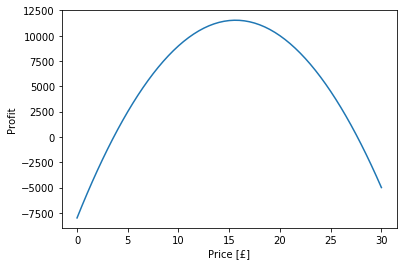

In [89]:
import matplotlib.pyplot as plt

def profitList(maxPrice = 30):
    expenses = 8000
    prices = [x/2 for x in range(maxPrice * 2 + 1)]
    profits = []
    for p in range(maxPrice * 2 + 1):
        price = p / 2
        income = sales(price) * price
        profit = income - expenses
        profits.append(profit)
    return prices, profits

prices, profits = profitList()
plt.plot(prices, profits)
plt.xlabel('Price [£]')
plt.ylabel('Profit')
plt.show()